In [3]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [22]:
import math
import pickle
import statistics
import numpy as np
import pandas as pd
from collections import defaultdict

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, log_loss, make_scorer
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix, auc
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
from catboost import CatBoostRegressor

In [46]:
df=pd.read_pickle("Data/df.pkl")
df_drop=pd.read_pickle("Data/df_drop.pkl")
df_no_na=pd.read_pickle("Data/df_no_na.pkl")

In [47]:
df_drop = df_drop.reset_index(drop = True)
df_no_na = df_no_na.reset_index(drop = True)

## Prepare Data

In [48]:
df_train=df_drop.values

X = df_train[:, 2:].astype(str)
y = df_train[:, 1].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=4444)


In [60]:
# Setting up a columns name translator 
X_dummies = df_drop.iloc[:, 2:].astype(str)
X_dummies = pd.get_dummies(X_dummies)

In [62]:
len(X_dummies.columns) # Verify the length from "get_dummies" is the same as "one_hot_encode"

175

In [55]:
len(X_train[0]) 

175

In [64]:
names = list(X_dummies.columns) # Feature reference list for interpretation 

In [49]:
# one-hot encode input variables
onehot_encoder = OneHotEncoder(sparse=False)
onehot_encoder.fit(X_train)
X_train = onehot_encoder.transform(X_train)
X_test = onehot_encoder.transform(X_test)
#ordinal encode target variable
label_encoder = LabelEncoder()
label_encoder.fit(y_train)
y_train = label_encoder.transform(y_train)
y_test = label_encoder.transform(y_test)

## RandomForest

In [51]:
model = RandomForestClassifier()
# fit on the training set
model.fit(X_train, y_train)
# predict on test set
yhat = model.predict(X_test)
# evaluate predictions
print("Training: {:6.2f}%".format(100*model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*model.score(X_test, y_test)))
accuracy = accuracy_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)
print('Accuracy_: %.2f' % (accuracy*100))
print('roc_auc_score: %.2f' % (roc_auc*100))
print(classification_report(y_test, yhat))

Training: 100.00%
Test set:  85.42%
Accuracy_: 85.42
roc_auc_score: 79.56
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      1561
           1       0.81      0.66      0.72       641

    accuracy                           0.85      2202
   macro avg       0.84      0.80      0.81      2202
weighted avg       0.85      0.85      0.85      2202



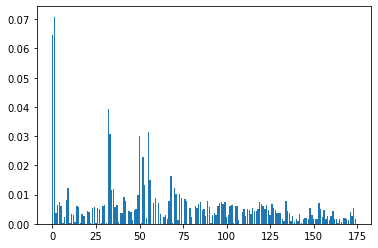

In [52]:
# get importance
importance = model.feature_importances_
# summarize feature importance
# for i,v in enumerate(importance):
#     print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance);


In [68]:
indices = np.argsort(importance)[-30:]
indices

array([ 85,  99,   4,  42,  67, 134,  89,  77,   8,  76,  74,  59,  41,
        49,  71,  73,  34,  35,   9,  70,  53,  56,  68,  52,  50,  33,
        55,  32,   0,   1])

In [115]:
feature_raw=[]
for i in indices:
    feature_raw.append(names[i])

In [116]:
feature_raw

['age_group_55 - 64 Years',
 'income_poverty_> $75,000',
 'h1n1_concern_2.0',
 'health_worker_1.0',
 'opinion_seas_vacc_effective_4.0',
 'employment_industry_fcxhlnwr',
 'education_College Graduate',
 'opinion_seas_sick_from_vacc_2.0',
 'h1n1_knowledge_1.0',
 'opinion_seas_sick_from_vacc_1.0',
 'opinion_seas_risk_5.0',
 'opinion_h1n1_sick_from_vacc_2.0',
 'health_worker_0.0',
 'opinion_h1n1_vacc_effective_4.0',
 'opinion_seas_risk_2.0',
 'opinion_seas_risk_4.0',
 'doctor_recc_seasonal_0.0',
 'doctor_recc_seasonal_1.0',
 'h1n1_knowledge_2.0',
 'opinion_seas_risk_1.0',
 'opinion_h1n1_risk_2.0',
 'opinion_h1n1_risk_5.0',
 'opinion_seas_vacc_effective_5.0',
 'opinion_h1n1_risk_1.0',
 'opinion_h1n1_vacc_effective_5.0',
 'doctor_recc_h1n1_1.0',
 'opinion_h1n1_risk_4.0',
 'doctor_recc_h1n1_0.0',
 'seasonal_vaccine_0',
 'seasonal_vaccine_1']

In [131]:
feature_clean=[]
for i in feature_raw:
    if "." in (i.split("_")[-1]):
        feature_clean.append("_".join(i.split("_")[:-1]))
    else:
        feature_clean.append(i)

In [132]:
feature_keep = set(feature_clean)

In [139]:
len(feature_keep)

17

In [140]:
zip_list=list(zip(feature_clean, importance[-30:]))

In [169]:
zip_list

[('age_group_55 - 64 Years', 0.0018459710968270911),
 ('income_poverty_> $75,000', 0.0020599087288576535),
 ('h1n1_concern', 0.0017853189541767842),
 ('health_worker', 0.005403747053501599),
 ('opinion_seas_vacc_effective', 0.0030382179894259797),
 ('employment_industry_fcxhlnwr', 0.0018126966996551356),
 ('education_College Graduate', 0.0015145449309786779),
 ('opinion_seas_sick_from_vacc', 0.0015201488871464974),
 ('h1n1_knowledge', 0.0072727450524772246),
 ('opinion_seas_sick_from_vacc', 0.005096474122892275),
 ('opinion_seas_risk', 0.002261676249823239),
 ('opinion_h1n1_sick_from_vacc', 0.004790131111084453),
 ('health_worker', 0.001615459755866395),
 ('opinion_h1n1_vacc_effective', 0.002508738110761985),
 ('opinion_seas_risk', 0.0013480392000766598),
 ('opinion_seas_risk', 0.002533108920855741),
 ('doctor_recc_seasonal', 0.004382791078920471),
 ('doctor_recc_seasonal', 0.001585181270511172),
 ('h1n1_knowledge', 0.0017842324807938192),
 ('opinion_seas_risk', 0.00035811754769925604)

In [150]:
len(zip_list)

30

In [200]:
from collections import Counter, defaultdict

imp=defaultdict(float)
for i in zip_list:
    imp[i[0]]+=i[1]


In [201]:
imp_df=pd.Series(imp).sort_values(ascending = False)

In [202]:
imp_df = pd.DataFrame(imp_df)

In [205]:
imp_df.reset_index(inplace=True)

In [212]:
imp_df.rename(columns = {'index':'features', 0:'importance'}, inplace = True)

In [213]:
imp_df

,features,importance
0,h1n1_knowledge,0.009057
1,opinion_h1n1_risk,0.008636
2,health_worker,0.007019
3,opinion_seas_sick_from_vacc,0.006617
4,opinion_seas_risk,0.006501
5,doctor_recc_seasonal,0.005968
6,seasonal_vaccine_0,0.005447
7,opinion_seas_vacc_effective,0.004921
8,opinion_h1n1_sick_from_vacc,0.004790
9,doctor_recc_h1n1,0.004096


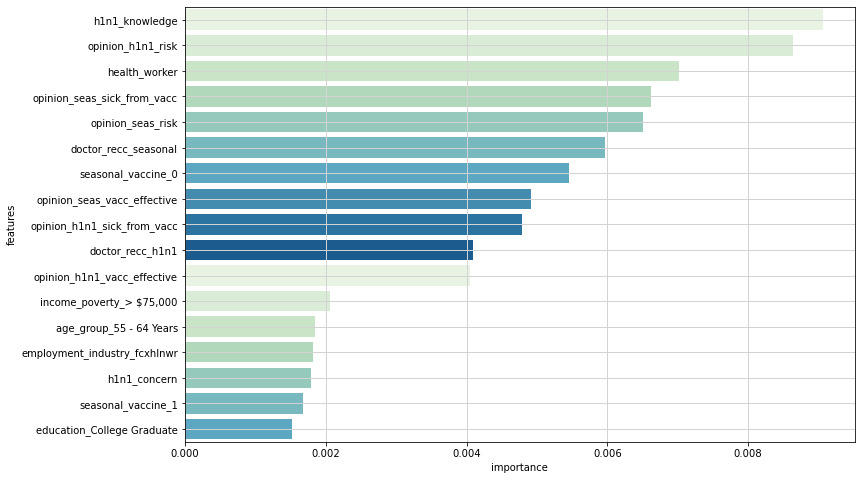

In [219]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='importance', y='features', data=imp_df, palette=sns.color_palette("GnBu", 10))
# plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

## CatBoost

In [220]:
model_cat = CatBoostRegressor()
# fit on the training set
model_cat.fit(X_train, y_train)
# predict on test set
yhat = model_cat.predict(X_test)
# evaluate predictions
print("Training: {:6.2f}%".format(100*model.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*model.score(X_test, y_test)))
accuracy = accuracy_score(y_test, yhat)
roc_auc = roc_auc_score(y_test, yhat)
print('Accuracy_: %.2f' % (accuracy*100))
print('roc_auc_score: %.2f' % (roc_auc*100))
print(classification_report(y_test, yhat))

Learning rate set to 0.052227
0:	learn: 0.4491435	total: 77.8ms	remaining: 1m 17s
1:	learn: 0.4409957	total: 97ms	remaining: 48.4s
2:	learn: 0.4322459	total: 108ms	remaining: 35.9s
3:	learn: 0.4251385	total: 125ms	remaining: 31.2s
4:	learn: 0.4183116	total: 136ms	remaining: 27.1s
5:	learn: 0.4125395	total: 149ms	remaining: 24.7s
6:	learn: 0.4063725	total: 159ms	remaining: 22.5s
7:	learn: 0.4008777	total: 172ms	remaining: 21.3s
8:	learn: 0.3965129	total: 199ms	remaining: 21.9s
9:	learn: 0.3921987	total: 213ms	remaining: 21.1s
10:	learn: 0.3877859	total: 244ms	remaining: 21.9s
11:	learn: 0.3837998	total: 260ms	remaining: 21.4s
12:	learn: 0.3797370	total: 274ms	remaining: 20.8s
13:	learn: 0.3762345	total: 298ms	remaining: 21s
14:	learn: 0.3729957	total: 309ms	remaining: 20.3s
15:	learn: 0.3701110	total: 345ms	remaining: 21.2s
16:	learn: 0.3673770	total: 370ms	remaining: 21.4s
17:	learn: 0.3649091	total: 405ms	remaining: 22.1s
18:	learn: 0.3625978	total: 421ms	remaining: 21.7s
19:	learn: 0

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [222]:
roc_auc = roc_auc_score(y_test, yhat)
print('roc_auc_score: %.2f' % (roc_auc*100))


roc_auc_score: 90.40


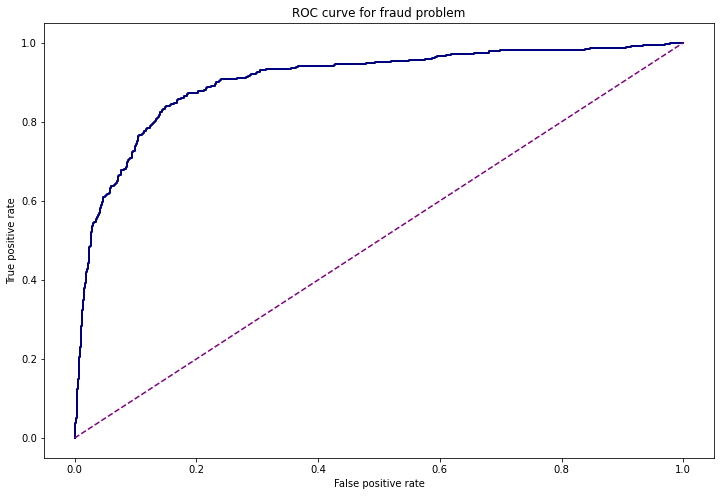

In [238]:
plt.figure(figsize=(12,8))
fpr, tpr, thresholds = roc_curve(y_test, yhat)
plt.plot(fpr, tpr,lw=2,c='navy')
plt.plot([0,1],[0,1],c='purple',ls='--')
plt.xlim([-0.05,1.05])
plt.ylim([-0.05,1.05])

plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve for fraud problem');
plt.savefig("Roc_CatBoost.svg")

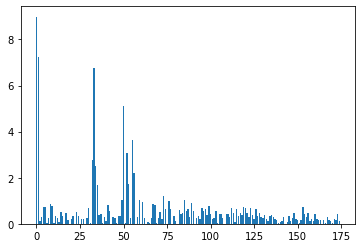

In [223]:
importance = model_cat.get_feature_importance()
plt.bar([x for x in range(len(importance))], importance);

In [224]:
indices = np.argsort(importance)[-30:]

feature_raw=[]
for i in indices:
    feature_raw.append(names[i])

feature_clean=[]
for i in feature_raw:
    if "." in (i.split("_")[-1]):
        feature_clean.append("_".join(i.split("_")[:-1]))b
    else:
        feature_clean.append(i)
        
zip_list=list(zip(feature_clean, importance[-30:]))

imp=defaultdict(float)
for i in zip_list:
    imp[i[0]]+=i[1]
    
imp_df=pd.Series(imp).sort_values(ascending = False)
imp_df = pd.DataFrame(imp_df)
imp_df.reset_index(inplace=True)
imp_df.rename(columns = {'index':'features', 0:'importance'}, inplace = True)

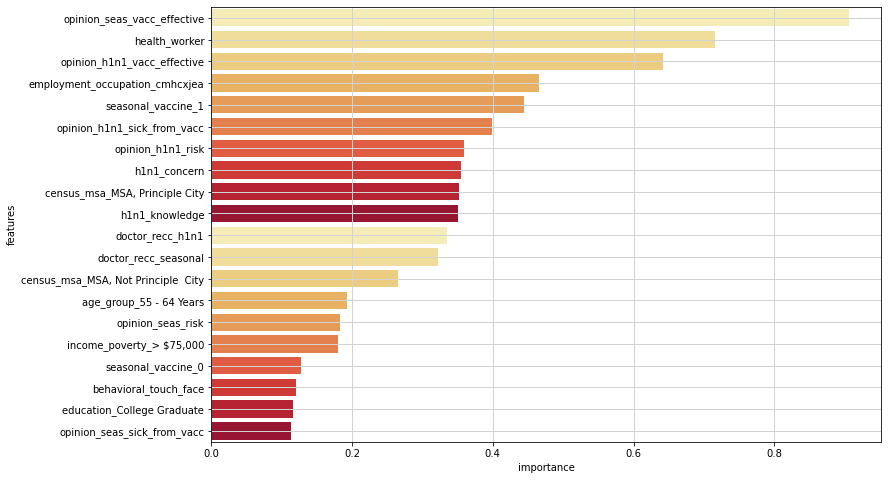

In [230]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x='importance', y='features', data=imp_df, palette=sns.color_palette("YlOrRd", 10))
# plt.xticks(rotation='vertical')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
plt.show()

In [235]:
feature_keep = set(feature_clean)
feature_keep

{'age_group_55 - 64 Years',
 'behavioral_touch_face',
 'census_msa_MSA, Not Principle  City',
 'census_msa_MSA, Principle City',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'education_College Graduate',
 'employment_occupation_cmhcxjea',
 'h1n1_concern',
 'h1n1_knowledge',
 'health_worker',
 'income_poverty_> $75,000',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_h1n1_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'seasonal_vaccine_0',
 'seasonal_vaccine_1'}